In [80]:
import os
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import pandas as pd
import random
import ntpath

from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle

In [81]:
datadir = 'Data Collected'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', None)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\3omd4\Desktop\Autonomous Udemy Course\Behavioural Cloning\Data Collected\IMG\center_2025_02_13_07_12_11_974.jpg,C:\Users\3omd4\Desktop\Autonomous Udemy Course\Behavioural Cloning\Data Collected\IMG\left_2025_02_13_07_12_11_974.jpg,C:\Users\3omd4\Desktop\Autonomous Udemy Course\Behavioural Cloning\Data Collected\IMG\right_2025_02_13_07_12_11_974.jpg,0.0,0.0,0,0.000078
1,C:\Users\3omd4\Desktop\Autonomous Udemy Course\Behavioural Cloning\Data Collected\IMG\center_2025_02_13_07_12_12_075.jpg,C:\Users\3omd4\Desktop\Autonomous Udemy Course\Behavioural Cloning\Data Collected\IMG\left_2025_02_13_07_12_12_075.jpg,C:\Users\3omd4\Desktop\Autonomous Udemy Course\Behavioural Cloning\Data Collected\IMG\right_2025_02_13_07_12_12_075.jpg,0.0,0.0,0,0.000079
2,C:\Users\3omd4\Desktop\Autonomous Udemy Course\Behavioural Cloning\Data Collected\IMG\center_2025_02_13_07_12_12_178.jpg,C:\Users\3omd4\Desktop\Autonomous Udemy Course\Behavioural Cloning\Data Collected\IMG\left_2025_02_13_07_12_12_178.jpg,C:\Users\3omd4\Desktop\Autonomous Udemy Course\Behavioural Cloning\Data Collected\IMG\right_2025_02_13_07_12_12_178.jpg,0.0,0.0,0,0.000078
3,C:\Users\3omd4\Desktop\Autonomous Udemy Course\Behavioural Cloning\Data Collected\IMG\center_2025_02_13_07_12_12_278.jpg,C:\Users\3omd4\Desktop\Autonomous Udemy Course\Behavioural Cloning\Data Collected\IMG\left_2025_02_13_07_12_12_278.jpg,C:\Users\3omd4\Desktop\Autonomous Udemy Course\Behavioural Cloning\Data Collected\IMG\right_2025_02_13_07_12_12_278.jpg,0.0,0.0,0,0.000078
4,C:\Users\3omd4\Desktop\Autonomous Udemy Course\Behavioural Cloning\Data Collected\IMG\center_2025_02_13_07_12_12_380.jpg,C:\Users\3omd4\Desktop\Autonomous Udemy Course\Behavioural Cloning\Data Collected\IMG\left_2025_02_13_07_12_12_380.jpg,C:\Users\3omd4\Desktop\Autonomous Udemy Course\Behavioural Cloning\Data Collected\IMG\right_2025_02_13_07_12_12_380.jpg,0.0,0.0,0,0.000078


In [82]:
def data_plot(data, x_label, y_label):
    plt.bar(center, hist, width=0.05)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))
    return

In [83]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2025_02_13_07_12_11_974.jpg,left_2025_02_13_07_12_11_974.jpg,right_2025_02_13_07_12_11_974.jpg,0.0,0.0,0,0.000078
1,center_2025_02_13_07_12_12_075.jpg,left_2025_02_13_07_12_12_075.jpg,right_2025_02_13_07_12_12_075.jpg,0.0,0.0,0,0.000079
2,center_2025_02_13_07_12_12_178.jpg,left_2025_02_13_07_12_12_178.jpg,right_2025_02_13_07_12_12_178.jpg,0.0,0.0,0,0.000078
3,center_2025_02_13_07_12_12_278.jpg,left_2025_02_13_07_12_12_278.jpg,right_2025_02_13_07_12_12_278.jpg,0.0,0.0,0,0.000078
4,center_2025_02_13_07_12_12_380.jpg,left_2025_02_13_07_12_12_380.jpg,right_2025_02_13_07_12_12_380.jpg,0.0,0.0,0,0.000078


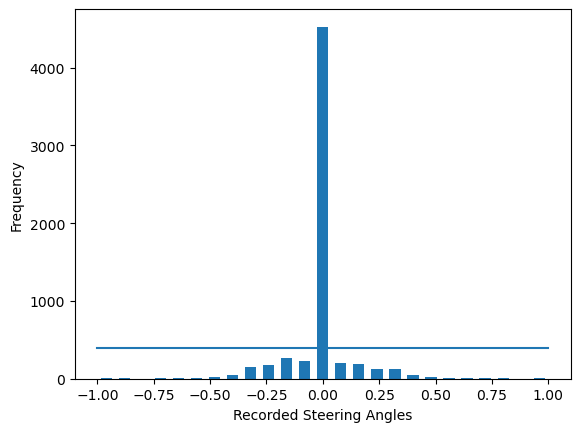

In [84]:
num_bins =25
hist,  bins = np.histogram(data['steering'], num_bins)
center = (bins[: -1] + bins[1:])*-0.5
samples_per_bin = 400

data_plot(data, x_label='Recorded Steering Angles', y_label='Frequency')


total data:  6191
removed:  4126
remaining data:  2065


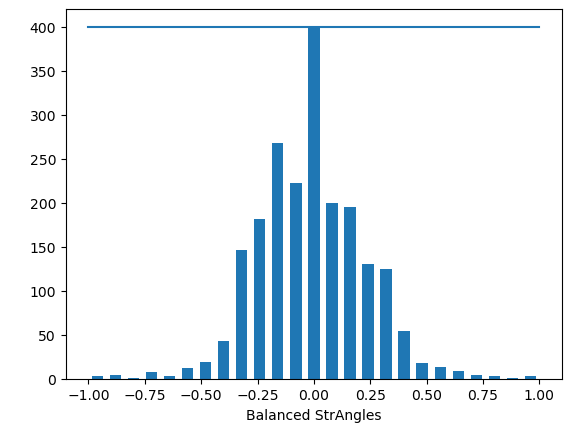

In [85]:
print('total data: ', len(data))
remove_list = []

for bin in range(num_bins):
    lst=[]
    for str_ang in range(len(data['steering'])):
        if data['steering'][str_ang] >= bins[bin] and data['steering'][str_ang] <= bins[bin+1]:
            lst.append(str_ang)
    lst = shuffle(lst)
    lst = lst[samples_per_bin:]
    remove_list.extend(lst)

print('removed: ', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining data: ', len(data))

hist,  bins = np.histogram(data['steering'], num_bins)
center = (bins[: -1] + bins[1:])*-0.5
samples_per_bin = 400

data_plot(data, x_label='Balanced StrAngles',y_label=' ')
